### 셀프 주유소는 정말 저렴한가?

In [1]:
#https://www.opinet.co.kr/searRgSelect.do  -> 무조건 홈페이지 첫화면으로 보내버림 -> 직접 찾아서 링크타고 페이지로 들어가야 함.

In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('driver/chromedriver')    #  설치(다운)해놓은 크롬 드라이버 -> 이거 하면 밑의 페이지 열림
driver.get('https://www.opinet.co.kr/user/main/mainView.do')
# 첫 페이지의 주소를 줄 수 밖에 없음. 다른걸로 가도 어차피 첫페이지 열림
# 개발자 도구로 -> 싼 주유소 찾기 -> 지역별 -> 찾아보면 <a class> <1i> 안의 <a href> 안헤 지역별이 있음.
# -> 우클릭 -> javascript 부분을 copy->Xpath

In [3]:
# 위의 Xpath 카피할 필요 없이 그냥 복사하면 됨. 함수니까. 익스큐트 스크립트의 자바 스크립트 함수를 기술만 해주면 됨
driver.execute_script('goSubPage(0,0,99)')  # 하면 정말 이동 됨

In [4]:
# 검색으로 지역의 서초구 화살표를 클릭 -> 해당부분 copy Xpath
gu_list_raw = \
driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")

# 얘를 제대로 갖고왔는지 확인

In [5]:
print(driver.page_source)

<html lang="ko"><head>
<title>싼 주유소 찾기 Opinet &gt; 싼주유소찾기 &gt; 지역별</title>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<meta http-equiv="Content-Script-Type" content="text/javascript">
<meta http-equiv="Content-Style-Type" content="text/css">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="initial-scale=1.0,user-scalable=no">
<link rel="stylesheet" type="text/css" href="/css/user/gis.css" media="screen">
<script type="text/javascript" src="/js/user/jquery-1.11.1.min.js"></script>
<script type="text/javascript" src="/js/user/OpinetUIGis.js"></script>
<script type="text/javascript" src="/js/user/OpinetUICommon.js"></script>
<script type="text/javascript" src="/js/user/fammilySite.js"></script>
<script type="text/javascript" src="/js/com/common-ajax.js"></script>
<script type="text/javascript" src="/js/com/common.js"></script>
<script type="text/javascript" src="/js/user/gis_ui_script.js"></script>
<script type="text/javascript"

In [6]:
# 구의 list를 얻고자 함.
gu_list = gu_list_raw.find_elements_by_tag_name('option')  #  find_element:처음 발견한거 하나 가져오는거, elements:모두 가져오는거

In [7]:
print(gu_list)

[<selenium.webdriver.remote.webelement.WebElement (session="3903094f60a396e4faa6625510208a27", element="c4aca5bd-152b-46cc-b92d-29d26be5ce12")>, <selenium.webdriver.remote.webelement.WebElement (session="3903094f60a396e4faa6625510208a27", element="46d71e10-a52b-4dc3-851d-c137961f5a8f")>, <selenium.webdriver.remote.webelement.WebElement (session="3903094f60a396e4faa6625510208a27", element="dd26fa12-593b-481f-a71e-a66c6dfbf159")>, <selenium.webdriver.remote.webelement.WebElement (session="3903094f60a396e4faa6625510208a27", element="a51b3197-424c-49e5-b81a-99a18fcb7662")>, <selenium.webdriver.remote.webelement.WebElement (session="3903094f60a396e4faa6625510208a27", element="d975701f-6a42-4637-9cf0-2ba76598c5e6")>, <selenium.webdriver.remote.webelement.WebElement (session="3903094f60a396e4faa6625510208a27", element="15e04f27-4adc-445f-9623-41c98eac5af9")>, <selenium.webdriver.remote.webelement.WebElement (session="3903094f60a396e4faa6625510208a27", element="596fc0af-808a-472d-baf0-b7cad25e

In [8]:
gu_names = [option.get_attribute('value') for option in gu_list]

In [9]:
print(len(gu_names))

26


In [10]:
print(gu_names)   #  맨앞에 빈칸 있음. -> 맨 앞에 value값의 시/군/구  부분이 빈칸이 됨. -> 제거해야함

['', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [11]:
# list에서 특정 값 삭제하기 -> remove
gu_names.remove('')   #  -> 이러면 앞의 빈칸 날라감
print(gu_names)  

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [12]:
# id가 SIGUNGU 인 놈. copy
element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[2])  # ->  이거 하면 해당하는 놈으로 페이지 이동함.

In [13]:
driver.execute_script("fn_excel_download('os_btn')")  # 이거 하면 정상적으로 다운됨  -> 다운로드\지역_위치별(주유소).xls

# -> 이놈은 뭘 복사하는게 아니라, 해당 버튼 span 위의 class -> href = javascript:fn excel download~~  <- 이부분을 직접 입력해야함
# 복사하면 아래처럼 다른 값이 나옴

# //*[@id="glopopd_excel"]
# undefined
# //*[@id="glopopd_excel"]/span
# <span>엑셀저장</span>
# document.querySelector("#glopopd_excel")
# <a class="btn_type6_ex_save" href="javascript:fn_excel_download('os_btn');" id="glopopd_excel" title="새창열림:엑셀저장"><span>엑셀저장</span></a>
# #glopopd_excel
# document.querySelector("#glopopd_excel")
# /html/body/div/div[2]/div/div[2]/div/form/div[2]/div[1]/div[7]/div/a

In [14]:
from tqdm.notebook import tqdm

In [25]:
for gu in tqdm(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    
    driver.execute_script("fn_excel_download('os_btn')")
    
    # 얘가 잘 내려오는지 보면 -> 잘 됨
    
# 예전엔 에러가 떴었음 -> 페이지가 로딩되는 시간이 있었는데, 그걸 고려 안하고 페이지가 안바뀐 상태에서 그냥 누르고 받고 누르고 받고 해서 같은게 계속 받아졌음
# 지금은 구별로 잘 받아진듯..

# -> 사실은 페이지 로딩시간, 다운로드 하는 시간을 고려해서 줘야함. -> time.sleep(1)  -> 1초

  0%|          | 0/25 [00:00<?, ?it/s]

In [15]:
import time
for gu in tqdm(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(1)  # 페이지 변환시간 1초.
    
    driver.execute_script("fn_excel_download('os_btn')")
    time.sleep(2)  #  다운하는데 2초 걸린다고 예상. -> 파일이 크면 다 줘야함
    
# 이러면 전체적인 타임 시간은 오래걸리더라고, 안전하게 받을 수 있음.    

  0%|          | 0/25 [00:00<?, ?it/s]

In [16]:
driver.close()  # 다 받았으면 닫아줌

In [30]:
# data 폴더 안에 그냥 넣으면 섞이니까, data 안에 oil이란 폴더를 만들어서 거기다가 넣겠음
# 지금부터 얘를 판다스 안에 data로 넣을 것.

In [17]:
# 파일을 읽어오는데, header 포함 위의 2줄은 안읽어올것임.
# 읽어오는데, 문제는, 파일이 25개가 아니라 2500개라고 생각하면, read로 언제 다 읽냐. -> 어떻게 한꺼번에 처리할 수 있을까
import pandas as pd
from glob import glob  #  -> 파이썬 자체 내장 glob -> 파일 path를 리눅스에서 와일드카드(파일명에 별표*)쓰듯이 쓸 수 있는 놈

In [18]:
glob('data\oil\지역_위치별*xls')  # 다 품은 것

['data\\oil\\지역_위치별(주유소) (1).xls',
 'data\\oil\\지역_위치별(주유소) (10).xls',
 'data\\oil\\지역_위치별(주유소) (11).xls',
 'data\\oil\\지역_위치별(주유소) (12).xls',
 'data\\oil\\지역_위치별(주유소) (13).xls',
 'data\\oil\\지역_위치별(주유소) (14).xls',
 'data\\oil\\지역_위치별(주유소) (15).xls',
 'data\\oil\\지역_위치별(주유소) (16).xls',
 'data\\oil\\지역_위치별(주유소) (17).xls',
 'data\\oil\\지역_위치별(주유소) (18).xls',
 'data\\oil\\지역_위치별(주유소) (19).xls',
 'data\\oil\\지역_위치별(주유소) (2).xls',
 'data\\oil\\지역_위치별(주유소) (20).xls',
 'data\\oil\\지역_위치별(주유소) (21).xls',
 'data\\oil\\지역_위치별(주유소) (22).xls',
 'data\\oil\\지역_위치별(주유소) (23).xls',
 'data\\oil\\지역_위치별(주유소) (24).xls',
 'data\\oil\\지역_위치별(주유소) (25).xls',
 'data\\oil\\지역_위치별(주유소) (3).xls',
 'data\\oil\\지역_위치별(주유소) (4).xls',
 'data\\oil\\지역_위치별(주유소) (5).xls',
 'data\\oil\\지역_위치별(주유소) (6).xls',
 'data\\oil\\지역_위치별(주유소) (7).xls',
 'data\\oil\\지역_위치별(주유소) (8).xls',
 'data\\oil\\지역_위치별(주유소) (9).xls',
 'data\\oil\\지역_위치별(주유소).xls']

In [19]:
stations_files = glob('data\oil\지역_위치별*xls')  # 얘를 stations_files에 저장.

In [31]:
# 임시적으로 df_list를 만듬
df_list = []
for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)  # 파일명, 헤더=2줄 자름
    df_list.append(tmp)

In [30]:
# conda install xlrd  -> 이걸 설치하면 위에놈이 실행 될것
# df_list.clear()

In [40]:
print(len(df_list))
print(len(gu_names))

26
25


In [34]:
# 실행되면 얘를 하나의 data frame으로 합쳐야 함.
station_raw = pd.concat(df_list)

In [35]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 12
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      493 non-null    object
 1   상호      493 non-null    object
 2   주소      493 non-null    object
 3   상표      493 non-null    object
 4   전화번호    493 non-null    object
 5   셀프여부    493 non-null    object
 6   고급휘발유   493 non-null    object
 7   휘발유     493 non-null    object
 8   경유      493 non-null    object
 9   실내등유    493 non-null    object
dtypes: object(10)
memory usage: 42.4+ KB


In [36]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1821,1653,1444,-
1,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1821,1663,1454,-
2,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1675,1459,-
3,서울특별시,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,02-3462-5215,N,1836,1678,1469,1070
4,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1687,1489,-


In [37]:
stations = pd.DataFrame({'Oil_store': station_raw['상호'],
                        '주소': station_raw['주소'],
                        '가격': station_raw['휘발유'],
                        '셀프': station_raw['셀프여부'],
                        '상표': station_raw['상표']})  # 첫번째 주유소의 이름은 Oil_store: 로

In [38]:
stations.head()

,Oil_store,주소,가격,셀프,상표
0,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1653,Y,SK에너지
1,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1663,Y,현대오일뱅크
2,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1675,Y,SK에너지
3,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1678,N,현대오일뱅크
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1687,Y,GS칼텍스


In [41]:
# 주소에 있는 값중 XX구 만 따로 빼서 구 라는 컬럼에 넣겠다  <-  는걸 하신다고
stations['구'] = \
[address.split()[1] for address in stations['주소']]  # 일단 주소를 갖고 와서 (서울 강남구 헌릉로 731 (세곡동)  <- 이런식으로 옴) -> 그걸 split 할 것

In [42]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1653,Y,SK에너지,강남구
1,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1663,Y,현대오일뱅크,강남구
2,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1675,Y,SK에너지,강남구
3,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1678,N,현대오일뱅크,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1687,Y,GS칼텍스,강남구


In [43]:
# 혹시 잘못된건 없는지 data를 꼭 한번 뽑아서 봐야 함.
stations['구'].unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [44]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  493 non-null    object
 1   주소         493 non-null    object
 2   가격         493 non-null    object
 3   셀프         493 non-null    object
 4   상표         493 non-null    object
 5   구          493 non-null    object
dtypes: object(6)
memory usage: 27.0+ KB


In [46]:
# 위의 dataframe에서 가격쪽에 짝대기(-)가 들어가있는 data를 어떻게 뽑아 내는지
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구
36,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
37,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
17,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),-,Y,현대오일뱅크,도봉구
28,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,-,Y,GS칼텍스,중랑구
15,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구


In [47]:
# 가격이 짝대기(-) 인 놈을 날려버리자 -> 어차피 source 없으니까
# 일단 위에놈 그대로 복사해서부터 시작
stations = stations[stations['가격'] != '-']  #  -> 가격이 짝대기(-)가 아닌놈만 나옴 -> 그걸 stations에 넣어주면 됨

In [48]:
stations.tail()

,Oil_store,주소,가격,셀프,상표,구
8,세원주유소,서울 강북구 한천로 918 (번동),1638,Y,SK에너지,강북구
9,SK에너지(주) 매일주유소,서울 강북구 삼양로 217 (미아동),1639,Y,SK에너지,강북구
10,에덴주유소,서울 강북구 월계로 195 (번동),1649,Y,SK에너지,강북구
11,대성석유(주)신광주유소,서울 강북구 삼양로 484,1655,N,GS칼텍스,강북구
12,현대오일뱅크(주)직영 미아셀프주유소,서울 강북구 도봉로 200 (미아동),1658,Y,현대오일뱅크,강북구


In [49]:
stations.info()
# 전체의 갯수가 493 -> 484 로 줄음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  484 non-null    object
 1   주소         484 non-null    object
 2   가격         484 non-null    object
 3   셀프         484 non-null    object
 4   상표         484 non-null    object
 5   구          484 non-null    object
dtypes: object(6)
memory usage: 26.5+ KB


In [50]:
stations['가격'] = [float(value) for value in stations['가격']]

In [51]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  484 non-null    object 
 1   주소         484 non-null    object 
 2   가격         484 non-null    float64
 3   셀프         484 non-null    object 
 4   상표         484 non-null    object 
 5   구          484 non-null    object 
dtypes: float64(1), object(5)
memory usage: 26.5+ KB


In [52]:
# 이게 더 간단한 방법(이라고 하는 사람 있음) -> 굳이 for문 안돌려도 됨
stations['가격'] = stations['가격'].astype(float)
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  484 non-null    object 
 1   주소         484 non-null    object 
 2   가격         484 non-null    float64
 3   셀프         484 non-null    object 
 4   상표         484 non-null    object 
 5   구          484 non-null    object 
dtypes: float64(1), object(5)
memory usage: 26.5+ KB


In [53]:
stations.head(20)

,Oil_store,주소,가격,셀프,상표,구
0,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1653.0,Y,SK에너지,강남구
1,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1663.0,Y,현대오일뱅크,강남구
2,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1675.0,Y,SK에너지,강남구
3,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1678.0,N,현대오일뱅크,강남구
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1687.0,Y,GS칼텍스,강남구
5,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1689.0,Y,현대오일뱅크,강남구
6,대교주유소,서울 강남구 강남대로 640 (신사동),1705.0,N,SK에너지,강남구
7,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),1709.0,Y,SK에너지,강남구
8,SK서광주유소,서울 강남구 역삼로 142,1725.0,Y,SK에너지,강남구
9,SK에너지㈜ 진달래주유소,서울 강남구 도곡로 208,1729.0,N,SK에너지,강남구


In [55]:
# index 리셋 시켜줌
stations.reset_index(inplace=True)  # inplace=True하면 반영됨, Flase하면 반영 안되고 출려만 해줌
stations.head(20)

,level_0,index,Oil_store,주소,가격,셀프,상표,구
0,0,0,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1653.0,Y,SK에너지,강남구
1,1,1,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1663.0,Y,현대오일뱅크,강남구
2,2,2,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1675.0,Y,SK에너지,강남구
3,3,3,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1678.0,N,현대오일뱅크,강남구
4,4,4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1687.0,Y,GS칼텍스,강남구
5,5,5,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1689.0,Y,현대오일뱅크,강남구
6,6,6,대교주유소,서울 강남구 강남대로 640 (신사동),1705.0,N,SK에너지,강남구
7,7,7,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),1709.0,Y,SK에너지,강남구
8,8,8,SK서광주유소,서울 강남구 역삼로 142,1725.0,Y,SK에너지,강남구
9,9,9,SK에너지㈜ 진달래주유소,서울 강남구 도곡로 208,1729.0,N,SK에너지,강남구


In [56]:
# 원래 있던 index는 지워버리자 -> del
del stations['index']
stations.head(20)   # 원하는대로 이전 index 날라감

,level_0,Oil_store,주소,가격,셀프,상표,구
0,0,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1653.0,Y,SK에너지,강남구
1,1,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1663.0,Y,현대오일뱅크,강남구
2,2,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1675.0,Y,SK에너지,강남구
3,3,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1678.0,N,현대오일뱅크,강남구
4,4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1687.0,Y,GS칼텍스,강남구
5,5,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1689.0,Y,현대오일뱅크,강남구
6,6,대교주유소,서울 강남구 강남대로 640 (신사동),1705.0,N,SK에너지,강남구
7,7,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),1709.0,Y,SK에너지,강남구
8,8,SK서광주유소,서울 강남구 역삼로 142,1725.0,Y,SK에너지,강남구
9,9,SK에너지㈜ 진달래주유소,서울 강남구 도곡로 208,1729.0,N,SK에너지,강남구


In [57]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   level_0    484 non-null    int64  
 1   Oil_store  484 non-null    object 
 2   주소         484 non-null    object 
 3   가격         484 non-null    float64
 4   셀프         484 non-null    object 
 5   상표         484 non-null    object 
 6   구          484 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 26.6+ KB


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프의 한글 뽑기
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"  # Windows 밑에있는 맑은 폰트
if platform.system() == 'Darwin':  
    rc('font', family='AppleGothic')   # 맥일 경우 애플 고딕
elif platform.system() == 'Windows':  # Window면 
    font_name = font_manager.FontProperties(fname=path).get_name()   #  path를 쓰겠다는 것
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')   # 이도저도 아니면 에러

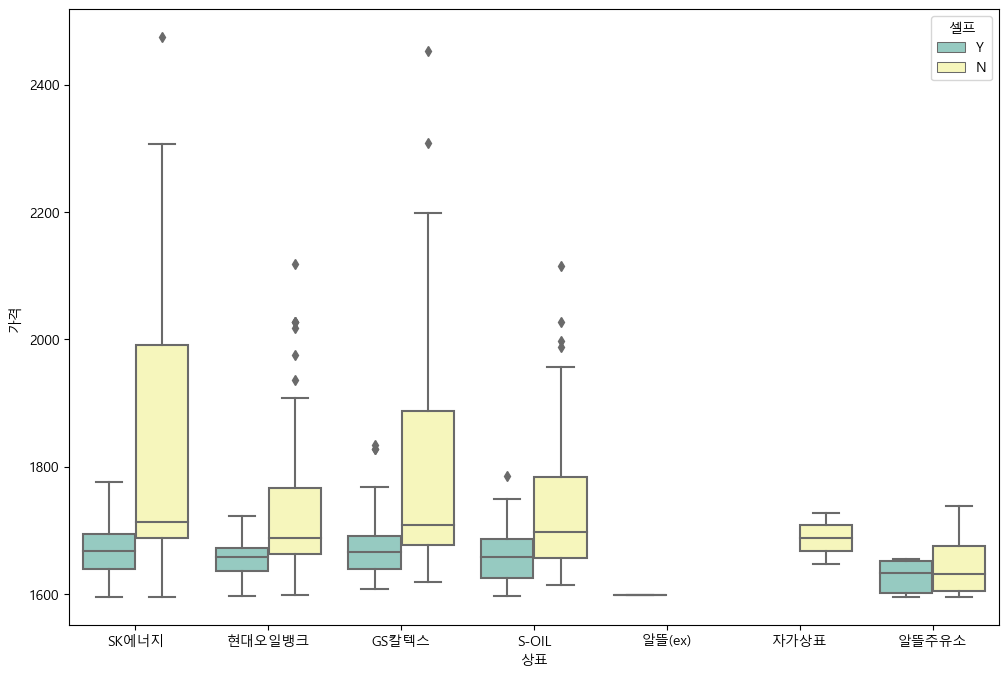

In [61]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, \
            palette='Set3')
plt.show()

# 박스의 가운뎃줄이 : 중위값(평균값 아님) -> 전체 데이터를 1렬로 sort한 다음 -> 정 중앙의 위치에 있는 값이 중위값
# 위엣줄이 3사분위 칸 넘어간게 4사분위=특이치, 이상치(영어로는 outlier)  / 아래쪽이 1사분위인듯


# self 주유소가 녹색 -> 알뜰주유소가 정말 싸구나 라는걸 알 수 있음.

In [62]:
# 박스 기준 아래가 Q1, 위가 Q3
# 상자로부터 아래 직선의 계산식 : Q1 - 1.5 * (Q3 - Q1)
# 상자로부터 위 직선의 계산식 : Q3 + 1.5 * (Q3 - Q1)

# 통계학적으로 이 경계를 벗어나는건 이상값으로 여겨서, 취급 안함

C:\Users\Administrator\anaconda3\envs\python-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Administrator\anaconda3\envs\python-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


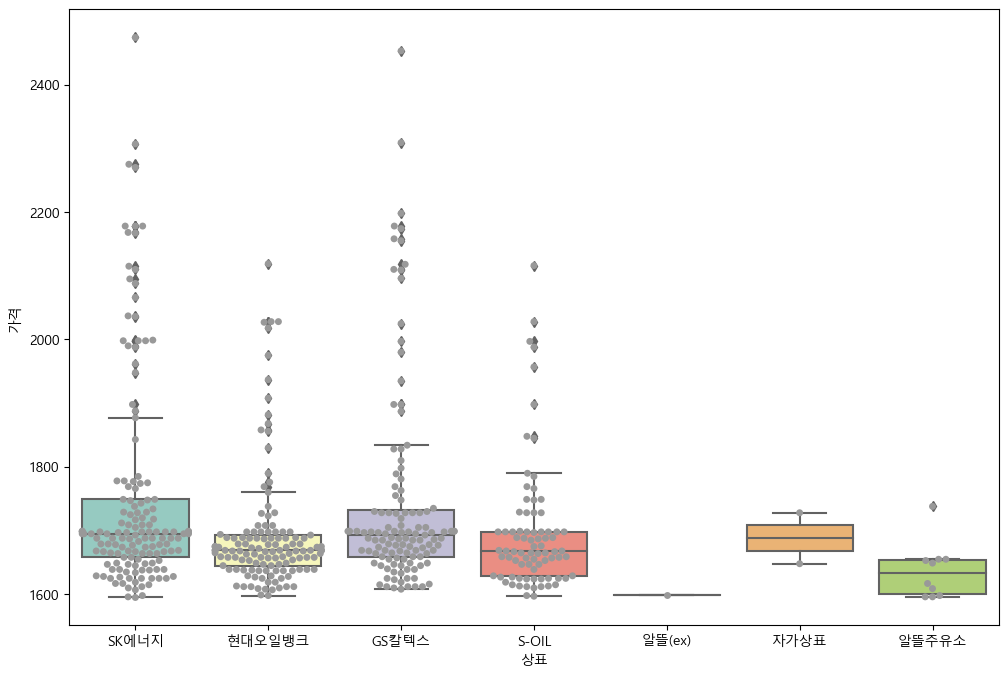

In [63]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', data=stations, \
            palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.6')
plt.show()

# swarmplot : 개구리가 하천에 가서 알 낳는 모양 -> 어디에 많이 분포되어있는가를 점으로 표시해줌

In [64]:
# 오후(다음시간)에는, 구별 가격을 가지고 지도에 표시할것

In [65]:
import json
import folium
import googlemaps

stations.sort_values(by='가격', ascending=False).head(10)
# 가격이 가장 높은 10지역

,level_0,Oil_store,주소,가격,셀프,상표,구
333,333,서남주유소,서울 중구 통일로 30,2474.0,N,SK에너지,중구
298,298,서계주유소,서울 용산구 청파로 367 (서계동),2453.0,N,GS칼텍스,용산구
332,332,필동주유소,서울 중구 퇴계로 196 (필동2가),2309.0,N,GS칼텍스,중구
331,331,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2307.0,N,SK에너지,중구
35,35,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구
297,297,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2270.0,N,SK에너지,용산구
330,330,약수주유소,서울 중구 다산로 173,2198.0,N,GS칼텍스,중구
296,296,에너비스,서울 용산구 한남대로 82 (한남동),2178.0,N,SK에너지,용산구
322,322,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2178.0,N,SK에너지,종로구
295,295,한남지점,서울 용산구 한남대로21길 4 (한남동),2178.0,N,SK에너지,용산구


In [66]:
stations.sort_values(by='가격').head(10)

,level_0,Oil_store,주소,가격,셀프,상표,구
53,53,동서울고속주유소,서울 동대문구 한천로 414,1595.0,Y,SK에너지,동대문구
361,361,화곡역주유소,서울 강서구 강서로 154 (화곡동),1596.0,Y,알뜰주유소,강서구
362,362,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1596.0,N,알뜰주유소,강서구
217,217,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1596.0,N,SK에너지,양천구
218,218,현대주유소,서울 양천구 남부순환로 372 (신월동),1597.0,Y,S-OIL,양천구
258,258,성락주유소,서울 영등포구 가마산로 414 (신길동),1598.0,Y,S-OIL,영등포구
261,261,도림주유소,서울 영등포구 도림로 343 (도림동),1598.0,Y,알뜰주유소,영등포구
260,260,영등포제일셀프주유소,서울 영등포구 가마산로 379,1598.0,Y,현대오일뱅크,영등포구
259,259,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1598.0,Y,SK에너지,영등포구
262,262,(주)강서오일,서울 영등포구 도신로 151,1599.0,N,현대오일뱅크,영등포구


In [67]:
# 구별로 가격평균
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'])  # 디스플레이에는 가격만 할 거다
gu_data.head()

,가격
구,
강남구,1859.055556
강동구,1761.875000
강북구,1631.538462
강서구,1679.181818
관악구,1702.600000


In [76]:
map = folium.Map(location=[37.5502,126.982], zoom_start=11, 
                 tiles='Stamen Toner')
folium.Choropleth(geo_data=geo_str, 
                  data=gu_data, 
                  columns=[gu_data.index, '가격'], 
                  fill_color='YlOrRd',  #'PuRd',
                  key_on='feature.id').add_to(map)
map
                           

# matplotlib.org  에서 ->
# matplotlib.org/stable/tutorials/colors/colormaps.html  에서 색깔 보기 가능

NameError: name 'geo_str' is not defined

In [77]:
# 비싼거 기준 상하위 10개씩 뽑아보자
# 일단 비싼거 10개 먼저
oil_price_top10 = \
    stations.sort_values(by='가격', ascending=False).head(10)

In [78]:
oil_price_top10

,level_0,Oil_store,주소,가격,셀프,상표,구
333,333,서남주유소,서울 중구 통일로 30,2474.0,N,SK에너지,중구
298,298,서계주유소,서울 용산구 청파로 367 (서계동),2453.0,N,GS칼텍스,용산구
332,332,필동주유소,서울 중구 퇴계로 196 (필동2가),2309.0,N,GS칼텍스,중구
331,331,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2307.0,N,SK에너지,중구
35,35,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구
297,297,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2270.0,N,SK에너지,용산구
330,330,약수주유소,서울 중구 다산로 173,2198.0,N,GS칼텍스,중구
296,296,에너비스,서울 용산구 한남대로 82 (한남동),2178.0,N,SK에너지,용산구
322,322,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2178.0,N,SK에너지,종로구
295,295,한남지점,서울 용산구 한남대로21길 4 (한남동),2178.0,N,SK에너지,용산구


In [87]:
# 마찬가지로 가장 싼놈 10개
oil_price_bottom10 = \
    stations.sort_values(by='가격').head(10)  #  , ascending=False  ->  요놈만 빼버리면 됨

In [88]:
oil_price_bottom10

,level_0,Oil_store,주소,가격,셀프,상표,구
53,53,동서울고속주유소,서울 동대문구 한천로 414,1595.0,Y,SK에너지,동대문구
361,361,화곡역주유소,서울 강서구 강서로 154 (화곡동),1596.0,Y,알뜰주유소,강서구
362,362,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1596.0,N,알뜰주유소,강서구
217,217,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1596.0,N,SK에너지,양천구
218,218,현대주유소,서울 양천구 남부순환로 372 (신월동),1597.0,Y,S-OIL,양천구
258,258,성락주유소,서울 영등포구 가마산로 414 (신길동),1598.0,Y,S-OIL,영등포구
261,261,도림주유소,서울 영등포구 도림로 343 (도림동),1598.0,Y,알뜰주유소,영등포구
260,260,영등포제일셀프주유소,서울 영등포구 가마산로 379,1598.0,Y,현대오일뱅크,영등포구
259,259,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1598.0,Y,SK에너지,영등포구
262,262,(주)강서오일,서울 영등포구 도신로 151,1599.0,N,현대오일뱅크,영등포구


In [81]:
gmap_key = "xxxx"
gmaps = googlemaps.Client(key=gmap_key)

ValueError: Invalid API key provided.

In [84]:
import numpy as np

lat = []
lng = []

for n in tqdm(oil_price_top10.index):  # 숫자가 많으니까 tqdm으로 감싸버리자.
    try:
        temp = gmaps.geocode(oil_price_top10['Oil_store'][293], language='ko')
        lat.append(temp[0]['geometry']['location']['lat'])
        lng.append(temp[0]['geometry']['location']['lng'])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("no address!!")
    
# 여기있는 주소는, 특히 대량의 주소에는 실제 지도상에 없을수도 있음
# -> 그럴땐 try: , except:  로 묶어서
# except: lat.append(np.nan)  / lng.append(np.nan)   /  print("no address!!")  <- 로 처리
# 주소가 잘못되어서 없을수도 있을 수 있다는걸 항상 염두에 둬야 함.


  0%|          | 0/10 [00:00<?, ?it/s]

no address!!
no address!!
no address!!
no address!!
no address!!
no address!!
no address!!
no address!!
no address!!
no address!!


In [89]:
lat = []
lng = []

for n in tqdm(oil_price_bottom10.index):  # 숫자가 많으니까 tqdm으로 감싸버리자.
    try:
        temp = gmaps.geocode(oil_price_bottom10['Oil_store'][293], language='ko')
        lat.append(temp[0]['geometry']['location']['lat'])
        lng.append(temp[0]['geometry']['location']['lng'])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("no address!!")
        
oil_price_bottom10['lat'] = lat        
oil_price_bottom10['lng'] = lng

  0%|          | 0/10 [00:00<?, ?it/s]

no address!!
no address!!
no address!!
no address!!
no address!!
no address!!
no address!!
no address!!
no address!!
no address!!


In [90]:
oil_price_bottom10

,level_0,Oil_store,주소,가격,셀프,상표,구,lat,lng
53,53,동서울고속주유소,서울 동대문구 한천로 414,1595.0,Y,SK에너지,동대문구,NaN,NaN
361,361,화곡역주유소,서울 강서구 강서로 154 (화곡동),1596.0,Y,알뜰주유소,강서구,NaN,NaN
362,362,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1596.0,N,알뜰주유소,강서구,NaN,NaN
217,217,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1596.0,N,SK에너지,양천구,NaN,NaN
218,218,현대주유소,서울 양천구 남부순환로 372 (신월동),1597.0,Y,S-OIL,양천구,NaN,NaN
258,258,성락주유소,서울 영등포구 가마산로 414 (신길동),1598.0,Y,S-OIL,영등포구,NaN,NaN
261,261,도림주유소,서울 영등포구 도림로 343 (도림동),1598.0,Y,알뜰주유소,영등포구,NaN,NaN
260,260,영등포제일셀프주유소,서울 영등포구 가마산로 379,1598.0,Y,현대오일뱅크,영등포구,NaN,NaN
259,259,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1598.0,Y,SK에너지,영등포구,NaN,NaN
262,262,(주)강서오일,서울 영등포구 도신로 151,1599.0,N,현대오일뱅크,영등포구,NaN,NaN


In [91]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):  # pd.notnull
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map

# 파란색이 가격 낮은곳, 빨간색이 가격 높은곳,  bottom10, top10

KeyError: 'lat'